## Problem Definition

https://www.kaggle.com/c/titanic#description

<pre>
Competition Description:
    
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


Goal:
    
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
</pre>

## Obtain Data

In [3]:
# import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import preprocessing
import seaborn as sns
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")
plt.style.use('seaborn-white')
%matplotlib inline

In [4]:
#Read Titanic train data
train =pd.read_csv("./data/train.csv")

<pre>Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
</pre>

## Analyze Data

In [5]:
#Display 5 first rows of train dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Check descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Coelho, Mr. Domingos Fernandeo",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
#Concise summary of a train DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Usefulness of attributes:
    
1) PassengerId seems to be just a random identifier, so it has no value for our model and it will be
   dropped from training\test datasets
    
2) Cabin attr, has too many Nan values, so it will be dropped from training\test datasets

## Prepare Data

In [8]:
# Define function for data analysis 
def plot_Survival_Rate_by_attr(a):
    display(train[['Survived',a]].groupby(a).mean())
    pclass_survived_ct = pd.crosstab(train[a], train['Survived'])
    pclass_survived_ct_div = pclass_survived_ct.div(pclass_survived_ct.sum(axis=1), axis=0)
   
    cat_count = Counter(train[a])
    df_cat=pd.DataFrame.from_dict(cat_count, orient='index')
    df_cat.sort_index(inplace=True)
        
    fig, ax =plt.subplots(1, 2, figsize=(18,5))                               
    fig.subplots_adjust(wspace=0.2)  

    pclass_survived_ct_div.plot(ax=ax[1], kind='bar', 
                            stacked=True, color =['#ff3333','#4dff4d'],
                            title='Survival Rate by '+a)
    
    ax[1].legend(loc='best', bbox_to_anchor=(1, 1), title='Survived')
    ax[1].set_ylabel('Survival Rate')
    ax[1].set_xlabel(a)
    
    
    df_cat.plot(ax=ax[0],kind='bar',title=a+' frequency')
    ax[0].legend_.remove()


### Sex attr. frequency, relation with Survival rate and preparation for model building

,Survived
Sex,
female,0.742038
male,0.188908


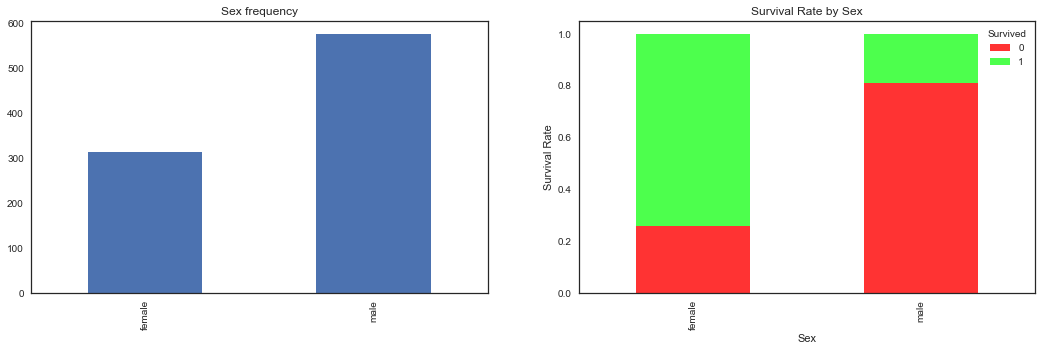

In [9]:
plot_Survival_Rate_by_attr('Sex')

As we could expect from 'age of gentlemens' women had higher chance to survive. That might be our most important attr. during classification.
Let's change this our categorical varaible to numeric and as there are only two attr. values we will leave them in on numeric variable called "Sex_flag"

In [10]:
#changing categorical values to numeric
train['Sex_flag'] = train['Sex'].map({"female":0,"male":1}).astype(int)

### Pclass attr. frequency, relation with Survival rate and preparation for model building

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


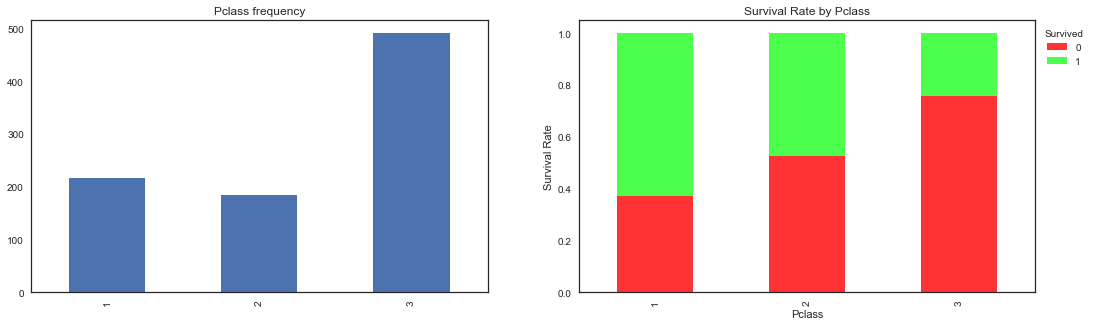

In [11]:
plot_Survival_Rate_by_attr('Pclass')

Again not very surprising. More many = Higher class =Higher chance to survive….We will leave this attr. as it is.

### Embarked attr. frequency, relation with Survival rate and preparation for model building

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


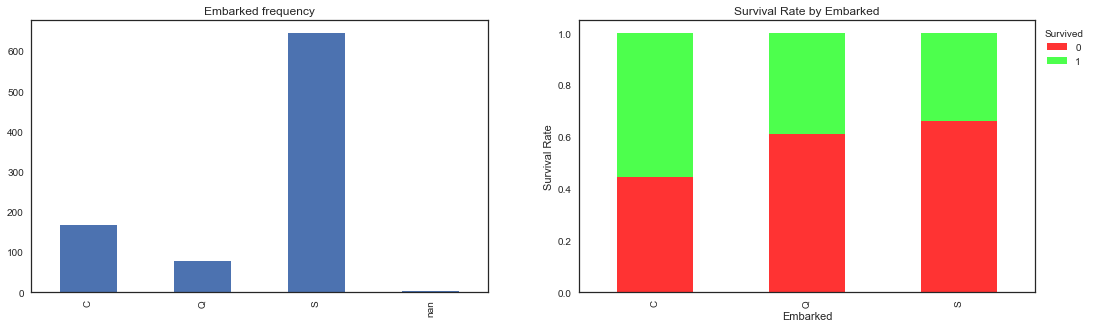

In [12]:
plot_Survival_Rate_by_attr('Embarked')

In [13]:
#For missing Embarked values, we will find similar Fare values in the same Pclass and use those values
train.sort_values(['Fare','Pclass']).reset_index().iloc[813:819]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_flag
813,558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,0
814,585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,0
815,61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,0
816,829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,0
817,445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,1
818,34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,1


In [14]:
#Fill in NaN values for Embarked
train['Embarked']=train.sort_values(['Fare','Pclass'])['Embarked'].ffill()

In [15]:
#Convert categorical variable into dummy/indicator variables
train = pd.concat([train, pd.get_dummies(train['Embarked'])], axis=1);

In [16]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_flag,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


### Fare attr. frequency, relation with Survival rate and preparation for model building

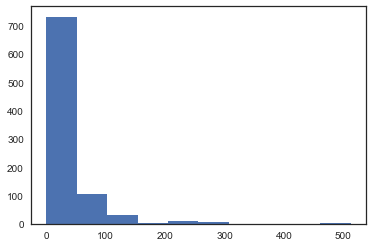

In [17]:
# display fare split on 10 equal bins frequency
plt.hist(train.Fare,bins=10);

In [18]:
train['Fare_bins']=pd.cut(train.Fare,bins=10)

,Survived
Fare_bins,
"(-0.512, 51.233]",0.318306
"(51.233, 102.466]",0.660377
"(102.466, 153.699]",0.741935
"(153.699, 204.932]",1.000000
"(204.932, 256.165]",0.636364
"(256.165, 307.398]",0.666667
"(307.398, 358.63]",NaN
"(358.63, 409.863]",NaN
"(409.863, 461.096]",NaN


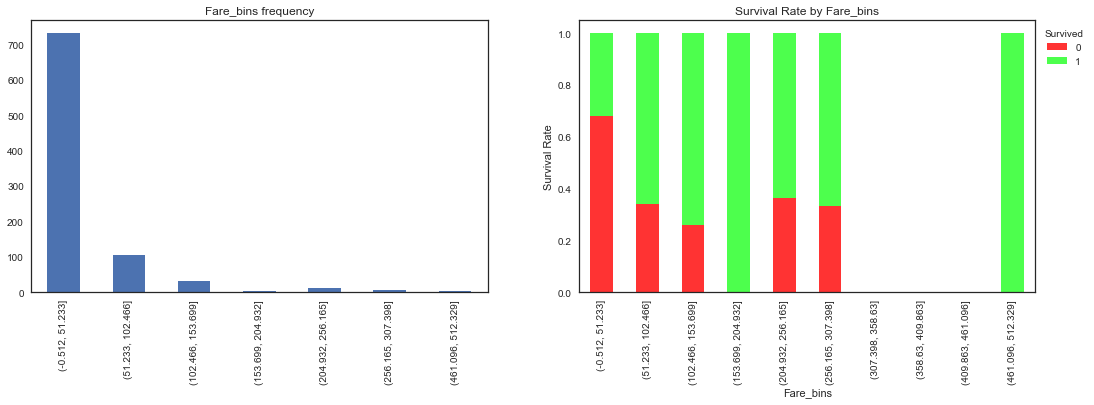

In [19]:
plot_Survival_Rate_by_attr('Fare_bins')

In [20]:
# Lets try to normalizeFare (Transform by scaling it between 0-1 range)
minmax_scale = preprocessing.MinMaxScaler().fit(train['Fare'].values)
df_minmax = minmax_scale.transform(train['Fare'])
train['fare_norm'] =pd.DataFrame(df_minmax)

In [21]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_flag,C,Q,S,Fare_bins,fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,"(-0.512, 51.233]",0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,"(51.233, 102.466]",0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1,"(-0.512, 51.233]",0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,"(51.233, 102.466]",0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,"(-0.512, 51.233]",0.015713


### Age attr. frequency, relation with Survival rate and preparation for model building

In [22]:
#For missing Age values, we will use a median value of grouping over Sex and Pclass attribiutes
train.groupby(['Sex','Pclass'])[['Age']].median()

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [23]:
#Fill in NaN values for Age
train['Age']=train.groupby(['Sex','Pclass'])[['Age']].transform(lambda x: x.fillna(x.median()))

In [24]:
# Lets categorize age by creating 6 age categories
bins=[0,8,16,25,40,60,100]
train['Age_bins']=pd.cut(train.Age,bins,labels=["Children","Teenagers","Youth","Adults","Middle_age","Older_People"])

,Survived
Age_bins,
Adults,0.424342
Children,0.666667
Middle_age,0.390625
Older_People,0.227273
Teenagers,0.413043
Youth,0.305638


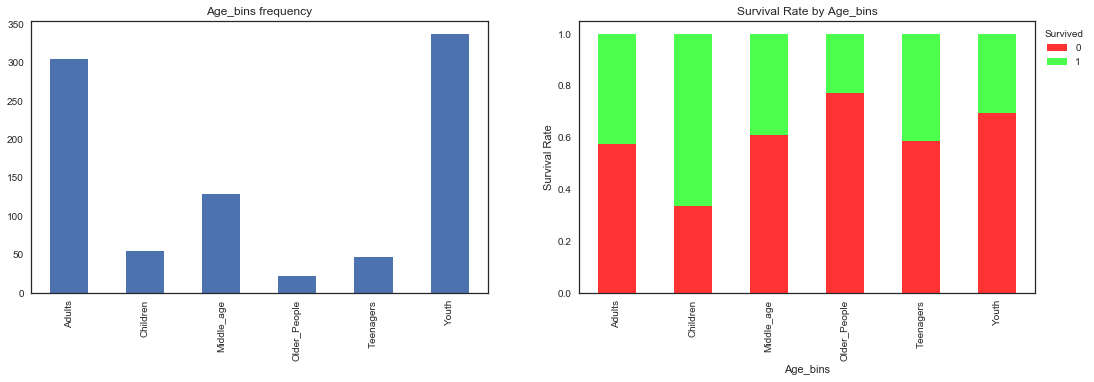

In [25]:
plot_Survival_Rate_by_attr('Age_bins')

In [26]:
#Convert categorical variable into dummy/indicator variables
train = pd.concat([train, pd.get_dummies(train['Age_bins'])], axis=1);

### SibSp attr. frequency, relation with Survival rate and preparation for model building

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


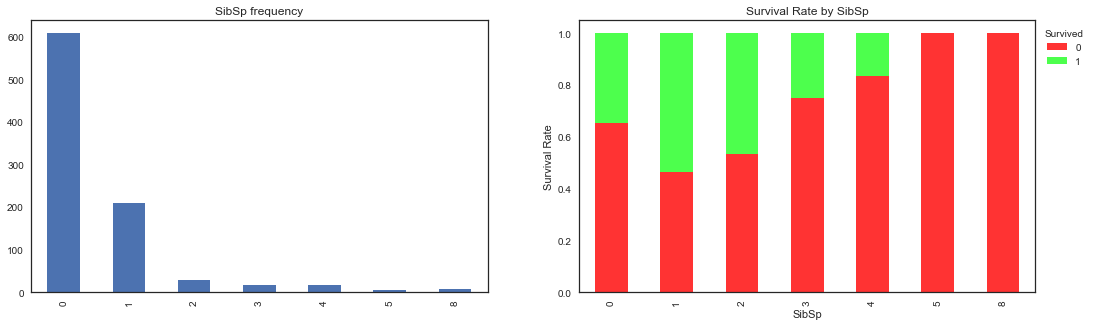

In [27]:
plot_Survival_Rate_by_attr('SibSp')

### Parch attr.frequency, relation with Survival rate and preparation for model building

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


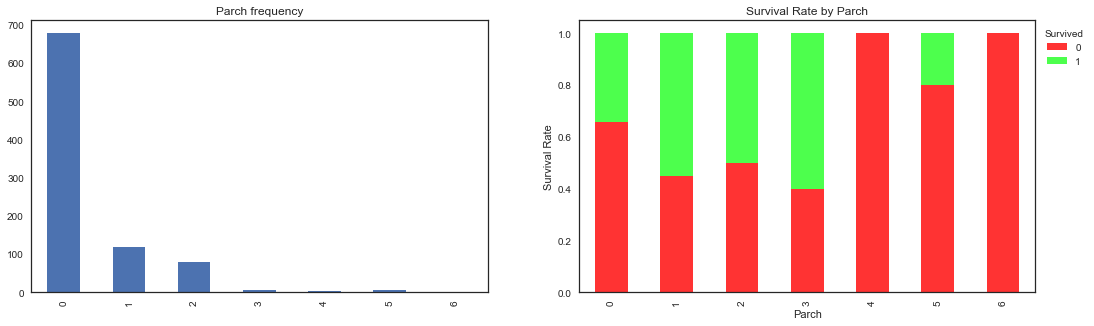

In [28]:
plot_Survival_Rate_by_attr('Parch')

In [29]:
# create one attr. from Parch and SibSp. All in all they store almost the same info...
train['Parch_SibSp'] =train.apply(lambda row: row['Parch']+row['SibSp'],axis=1)

,Survived
Parch_SibSp,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


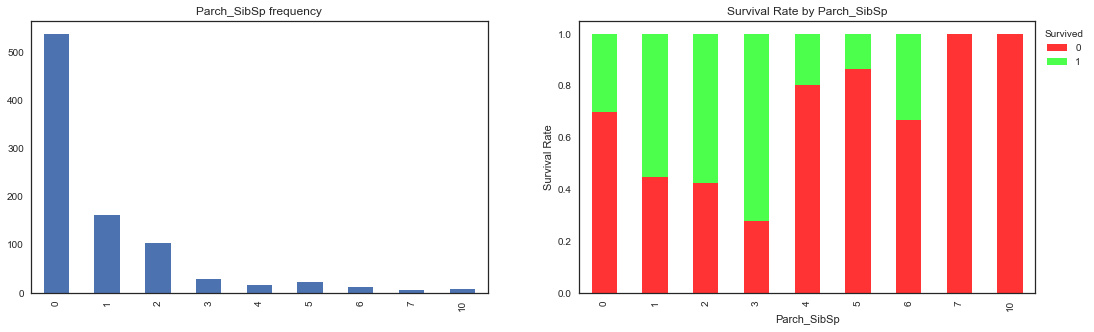

In [30]:
plot_Survival_Rate_by_attr('Parch_SibSp')

In [31]:
# Let's flatten this category a little bit and change the order to better represent relation between it's value
#and chance for survival
def Parch_SibSp_bins(row):
    if pd.isnull(row['Parch_SibSp']):
        return row['Parch_SibSp']
    if row['Parch_SibSp']==0:
        return 1
    elif (row['Parch_SibSp']>0 and row['Parch_SibSp']<4):
        return 0
    elif (row['Parch_SibSp']>3 and row['Parch_SibSp']<7):
        return 2
    else:
        return 3

train['Parch_SibSp_bins'] =train.apply(lambda row: Parch_SibSp_bins(row),axis=1)    

,Survived
Parch_SibSp_bins,
0,0.578767
1,0.303538
2,0.204082
3,0.000000


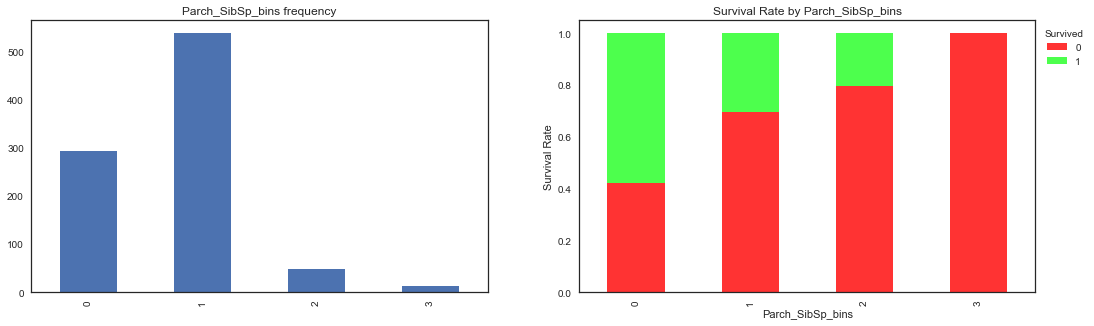

In [32]:
plot_Survival_Rate_by_attr('Parch_SibSp_bins')

### Name attr. frequency, relation with Survival rate and preparation for model building

In [33]:
# find words that occurs most often, on top of our list we should get titles
pd.Series([y for x in train.Name.values.flatten() for y in x.split()]).value_counts().head(10)

Mr.        517
Miss.      182
Mrs.       125
William     62
John        44
Master.     40
Henry       33
James       24
Charles     23
George      22
dtype: int64

In [34]:
# Create a new attr. storing title
def Names_title(row):
    if row.Name.lower().find('mr.')>-1:
        return 1
    if row.Name.lower().find('miss.')>-1:
        return 2
    if row.Name.lower().find('mrs.')>-1:
        return 3
    if row.Name.lower().find('master.')>-1:
        return 4
    else:
        return 0
train['Names_title_flag'] =train.apply(lambda row: Names_title(row),axis=1)   

,Survived
Names_title_flag,
0,0.444444
1,0.156673
2,0.697802
3,0.792000
4,0.575000


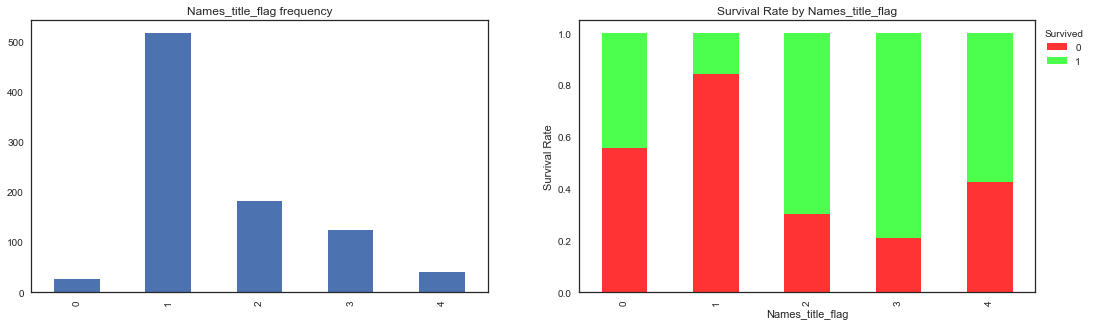

In [35]:
plot_Survival_Rate_by_attr('Names_title_flag')

### Dropping unrequired attribiutes

In [36]:
train.drop(['Fare_bins','Fare','Age','PassengerId', 'Name', 'Ticket', 'Cabin','Age_bins','Embarked','Sex', 'SibSp','Parch','Parch_SibSp'], axis=1, inplace=True)


In [37]:
train.head(5)

,Survived,Pclass,Sex_flag,C,Q,S,fare_norm,Adults,Children,Middle_age,Older_People,Teenagers,Youth,Parch_SibSp_bins,Names_title_flag
0,0,3,1,0,0,1,0.014151,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0.139136,1,0,0,0,0,0,0,3
2,1,3,0,0,0,1,0.015469,1,0,0,0,0,0,1,2
3,1,1,0,0,0,1,0.103644,1,0,0,0,0,0,0,3
4,0,3,1,0,0,1,0.015713,1,0,0,0,0,0,1,1


In [38]:
# Separate all attr. used for prediction from column that we are going to predict
train_x =train.iloc[:,1:]
train_y =train.iloc[:,0]

In [39]:
#Set aside 10% for final analysis
train_90, test_10 = train_test_split(train, test_size=0.1, random_state=0)

In [40]:
# Separate all attr. used for prediction from column that we are going to predict
train_90_x =train_90.iloc[:,1:]
train_90_y =train_90.iloc[:,0]
test_10_x =test_10.iloc[:,1:]
test_10_y =test_10.iloc[:,0]

### Model building

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics



In [61]:
def plot_model_result(model):
    
    # fit the model on entire training data
    model_all = model.fit(train_x, train_y)
    
    # fit the model on training data 
    model_hold = model.fit(train_90_x, train_90_y)

    # evaluate the mode with cross validation score
    results=model_hold.predict(test_10_x)
   
    fig, ax =plt.subplots(1, 2, figsize=(18,5))

    cm = confusion_matrix(test_10_y, results)
    #recall = TP / (TP + FN)
    #precision = TP / (TP + FP)
    #F-beta score is the weighted harmonic mean of precision and recall
    pr,rec,fsc,supp =precision_recall_fscore_support(test_10_y, results)
    sns.heatmap(cm, annot=True, ax = ax[0])

    # labels, title and ticks
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels')
    ax[0].set_title('Confusion Matrix', fontsize=14)
    ax[0].xaxis.set_ticklabels(['not survived', 'survived'])
    ax[0].yaxis.set_ticklabels(['survived', 'not survived'])


    fpr, tpr, thresholds = metrics.roc_curve(test_10_y, results)

    # Print ROC curve
    ax[1].plot(fpr,tpr);
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('ROC curve', fontsize=14)
    

    # evaluate the model with using Holdout sets
    print ('90/10 Holdout sets accuracy score:  ' + str(round( accuracy_score(test_10_y, results),2)))
    # evaluate the model with cross validation score
    print ('Cross validation score:  ' + str(round(cross_val_score(model_all, train_x, train_y).mean(),2)))
    print ('Area Under the Curve:  ' + str(round(metrics.auc(fpr, tpr),2)))
    print ('Recall for survival:  ' + str(round(rec[1],2)))
    print ('Precision for survival:  ' + str(round(pr[1],2)))
    print ('F-beta score for survival:  ' + str(round(fsc[1],2)))

#### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the Random Forest model class
rfc_model = RandomForestClassifier(n_estimators=100, random_state=0)

90/10 Holdout sets accuracy score:  0.84
Cross validation score:  0.8
Area Under the Curve:  0.84
Recall for survival:  0.79
Precision for survival:  0.84
F-beta score for survival:  0.82


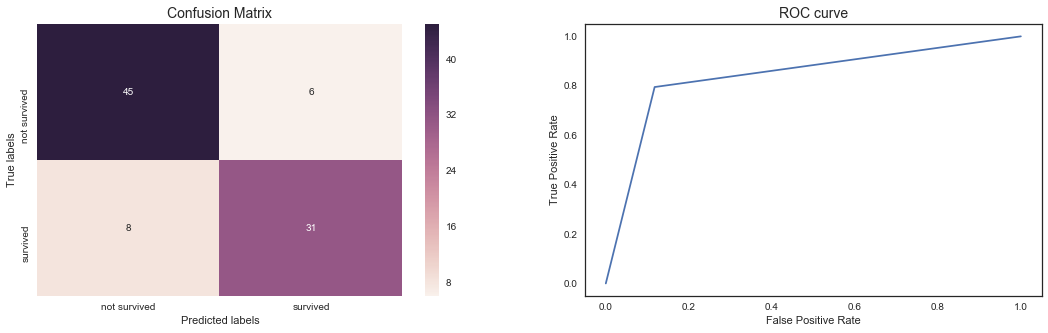

In [64]:
plot_model_result(rfc_model)

In [65]:
#recall = TP / (TP + FN)
#precision = TP / (TP + FP)

In [66]:
45/51

0.8823529411764706

#### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

# instantiate the Random Forest model class
lr_model = LogisticRegression(random_state=0)

90/10 Holdout sets accuracy score:  0.82
Cross validation score:  0.81
Area Under the Curve:  0.81
Recall for survival:  0.69
Precision for survival:  0.87
F-beta score for survival:  0.77


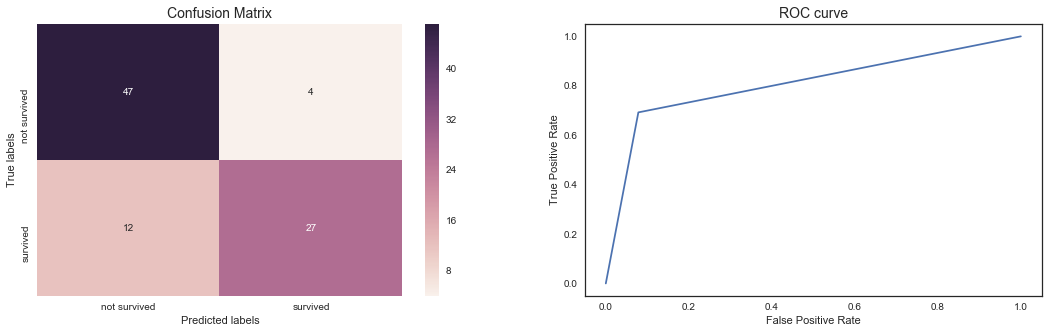

In [68]:
plot_model_result(lr_model)

#### Support Vector Machines

In [69]:
from sklearn.svm import SVC

# instantiate the Random Forest model class
svc_model = SVC(random_state=0)

90/10 Holdout sets accuracy score:  0.86
Cross validation score:  0.83
Area Under the Curve:  0.84
Recall for survival:  0.74
Precision for survival:  0.91
F-beta score for survival:  0.82


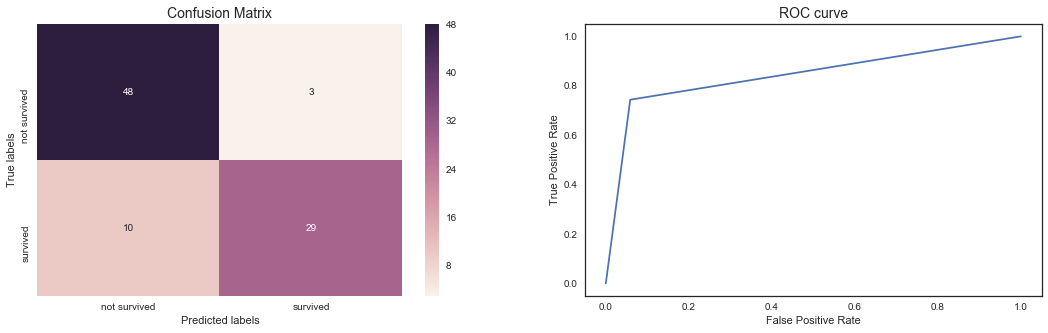

In [70]:
plot_model_result(svc_model)

#### Nearest Neighbors

In [71]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

# instantiate the Random Forest model class
nn_model = NearestCentroid()

90/10 Holdout sets accuracy score:  0.83
Cross validation score:  0.78
Area Under the Curve:  0.83
Recall for survival:  0.82
Precision for survival:  0.8
F-beta score for survival:  0.81


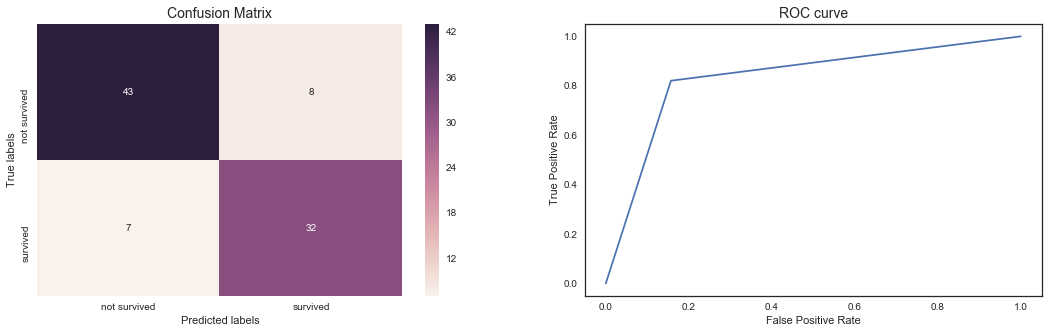

In [72]:
plot_model_result(nn_model)

### Create function containing all data preparation steps 

In [73]:
# Function for training data preparation
def train_data_prep (x):
    # Sex attr. preparation
    x['Sex_flag'] = x['Sex'].map({"female":0,"male":1}).astype(int)
    
    # Embarked attr. preparation
    x['Embarked']=x.sort_values(['Fare','Pclass'])['Embarked'].ffill()
    x = pd.concat([x, pd.get_dummies(x['Embarked'])], axis=1)
    
    # Fare attr. preparation
    minmax_scale = preprocessing.MinMaxScaler().fit(x['Fare'].values)
    df_minmax = minmax_scale.transform(x['Fare'])
    x['fare_norm'] =pd.DataFrame(df_minmax)
   
    # Age attr. preparation
    x['Age']=x.groupby(['Sex','Pclass'])[['Age']].transform(lambda y: y.fillna(y.median()))
    bins=[0,8,16,25,40,60,100]
    x['Age_bins']=pd.cut(x.Age,bins,labels=["Children","Teenagers","Youth","Adults","Middle_age","Older_People"])
    x = pd.concat([x, pd.get_dummies(x['Age_bins'])], axis=1);
    
    # Parch & SibSp attr. preparation
    x['Parch_SibSp'] =x.apply(lambda row: row['Parch']+row['SibSp'],axis=1)
    x['Parch_SibSp_bins'] =x.apply(lambda row: Parch_SibSp_bins(row),axis=1) 
    
    #Name attr. preparation
    x['Names_title_flag'] =x.apply(lambda row: Names_title(row),axis=1) 
    
    # Dropping unrequired attribiutes
    x.drop(['Fare','Age','PassengerId', 'Name', 'Ticket', 'Cabin','Age_bins','Embarked','Sex', 'SibSp','Parch','Parch_SibSp'], axis=1, inplace=True)
    
    return x

In [76]:
train=train_data_prep(train)

In [77]:
# Function for test data preparation
def test_data_prep (x, train):
    x['ind']='Test'
    train['ind']='Train'
    frames = [x,train]
    all_data = pd.concat(frames).reset_index(drop=True)
    
    # Sex attr. preparation
    all_data['Sex_flag'] = all_data['Sex'].map({"female":0,"male":1}).astype(int)
    
    # Embarked attr. preparation
    all_data['Embarked']=all_data.sort_values(['Fare','Pclass'])['Embarked'].ffill()
    all_data = pd.concat([all_data, pd.get_dummies(all_data['Embarked'])], axis=1)
    
    # Fare attr. preparation
    all_data['Fare']=all_data.groupby('Pclass')[['Fare']].transform(lambda y: y.fillna(y.median()))
    minmax_scale = preprocessing.MinMaxScaler().fit(all_data['Fare'].values)
    df_minmax = minmax_scale.transform(all_data['Fare'])
    all_data['fare_norm'] =pd.DataFrame(df_minmax)
   
    # Age attr. preparation
    all_data['Age']=all_data.groupby(['Sex','Pclass'])[['Age']].transform(lambda y: y.fillna(y.median()))
    bins=[0,8,16,25,40,60,100]
    all_data['Age_bins']=pd.cut(all_data.Age,bins,labels=["Children","Teenagers","Youth","Adults","Middle_age","Older_People"])
    all_data = pd.concat([all_data, pd.get_dummies(all_data['Age_bins'])], axis=1);
    
    # Parch & SibSp attr. preparation
    all_data['Parch_SibSp'] =all_data.apply(lambda row: row['Parch']+row['SibSp'],axis=1)
    all_data['Parch_SibSp_bins'] =all_data.apply(lambda row: Parch_SibSp_bins(row),axis=1) 
    
    #Name attr. preparation
    all_data['Names_title_flag'] =all_data.apply(lambda row: Names_title(row),axis=1) 
    
    # Dropping unrequired attribiutes
    
    all_data= all_data[all_data.ind == 'Test']
    all_data.drop(['Fare','ind','Age', 'PassengerId', 'Survived','Name', 'Ticket', 'Cabin','Age_bins','Embarked','Sex', 'SibSp','Parch','Parch_SibSp'], axis=1, inplace=True)
    

    #x.set_index('PassengerId', inplace=True)
    return all_data

### Submit results to Kagle

In [82]:
#Read Titanic train data
train =pd.read_csv("./data/train.csv")
test =pd.read_csv("./data/test.csv")

In [77]:
X_test= test_data_prep (test, train)

In [78]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 14 columns):
Pclass              418 non-null int64
Sex_flag            418 non-null int32
C                   418 non-null uint8
Q                   418 non-null uint8
S                   418 non-null uint8
fare_norm           418 non-null float64
Adults              418 non-null uint8
Children            418 non-null uint8
Middle_age          418 non-null uint8
Older_People        418 non-null uint8
Teenagers           418 non-null uint8
Youth               418 non-null uint8
Parch_SibSp_bins    418 non-null int64
Names_title_flag    418 non-null int64
dtypes: float64(1), int32(1), int64(3), uint8(9)
memory usage: 21.6 KB


In [79]:
#Y_pred = svc_model.predict(X_test)
Y_pred = lr_model.predict(X_test)

In [80]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [81]:
# My submission to the Kaggle's competition in scoring at 3,236 positon (out of 10,568 competition entries)